In [72]:
import numpy as np
import astropy.units as u
import astropy.coordinates as coord
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

from astroquery import open_exoplanet_catalogue as oec

%matplotlib inline
import matplotlib.pyplot as plt

import IPython.display as display

# Load the PANOPTES module dir
import sys
sys.path.append('..')

# For development
%load_ext autoreload
%autoreload 2

import matplotlib
matplotlib.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Downloads

Below are two files that should be download to work with the notebook below. The system should be smart about handling the caching but they may take a while initially

In [60]:
from astropy.utils.data import download_file
from astropy.utils import iers
iers.IERS.iers_table = iers.IERS_A.open(download_file(iers.IERS_A_URL, cache=True))

# getting the catalogue from the default remote source
oec_catalog = oec.get_catalogue()

In [3]:
# Import our base class
from panoptes import Panoptes

INFO:PanoptesLogger:Adding warning logging to: Target
INFO:PanoptesLogger:Adding warning logging to: Observation
INFO:PanoptesLogger:Adding warning logging to: Scheduler
INFO:PanoptesLogger:Adding warning logging to: Error
INFO:PanoptesLogger:Adding warning logging to: Observatory
INFO:PanoptesLogger:Adding warning logging to: Panoptes


In [4]:
# Get an instance of our Panoptes object
pan = Panoptes()

INFO:Panoptes:********************************************************************************
INFO:Panoptes:Initializing PANOPTES unit
INFO:Panoptes:Checking config
INFO:Panoptes:Welcome PAN 001
INFO:Panoptes:Setting up database connection
INFO:Panoptes:Setting up observatory
INFO:Observatory:Initializing observatory
INFO:Observatory:	 Setting up observatory details
INFO:Observatory:Setting up site details of observatory
INFO:Observatory:	 Setting up mount
INFO:Observatory:Creating mount: ioptron
INFO:PanoptesLogger:Adding warning logging to: SerialData
INFO:PanoptesLogger:Adding warning logging to: AbstractMount
INFO:PanoptesLogger:Adding warning logging to: Mount
INFO:Mount:Creating iOptron mount
INFO:Mount:Setting up commands for mount
INFO:Mount:Loading mount commands file: /var/panoptes/POCS/conf_files/mounts/ioptron.yaml
INFO:Mount:Mount commands updated from /var/panoptes/POCS/conf_files/mounts/ioptron.yaml
INFO:Mount:Mount commands set up
CRITICAL:SerialData:Could not set up s

In [5]:
# Display some info about our target
display.IFrame('https://en.wikipedia.org/wiki/HD_15082', 900, 400)

In [66]:
lon = pan.observatory.location.longitude
lat = pan.observatory.location.latitude
exo_transit_url = 'http://var2.astro.cz/ETD/predict_detail.php?STARNAME=WASP-33&PLANET=b&delka={}&sirka={:2.02f}'.format(lon, lat)
exo_transit_url

'http://var2.astro.cz/ETD/predict_detail.php?STARNAME=WASP-33&PLANET=b&delka=-155.58 deg&sirka=19.54 deg'

In [67]:
display.IFrame(exo_transit_url, 900, 400)

In [45]:
# Get our target
wasp33b = SkyCoord.from_name('HD15082')

<bound method SkyCoord.to_string of <SkyCoord (ICRS): (ra, dec) in deg
    (36.71274264, 37.55048139)>>

In [13]:
from astropy.coordinates import get_sun

midnight = Time('2015-8-12 00:00:00') - pan.observatory.gmt_offset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour

times = midnight + delta_midnight

altazframe = AltAz(obstime=times, location=pan.observatory.location)

sun_altaz = get_sun(times).transform_to(altazframe)  

In [20]:
# Get the AltAz for the object
wasp33b_altaz = wasp33b.transform_to(AltAz(obstime=midnight+delta_midnight, location=pan.observatory.location))

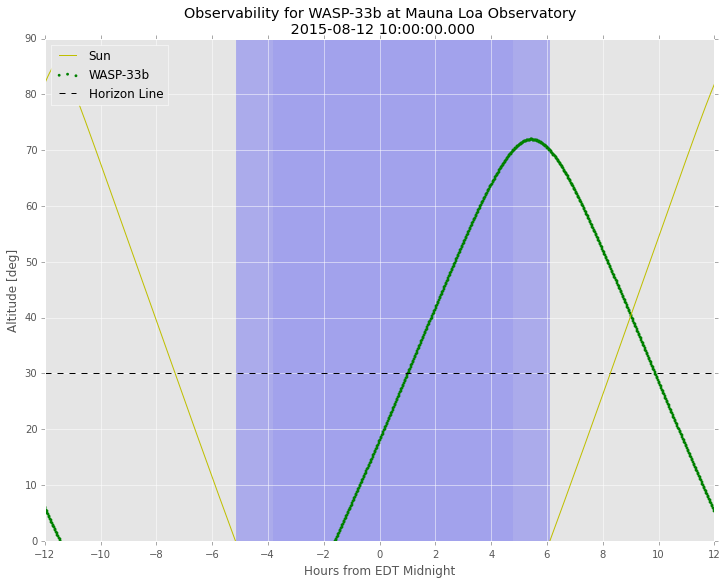

In [57]:
plt.figure(figsize=(12,9))

plt.plot(delta_midnight, sun_altaz.alt, color='y', label='Sun')  
plt.scatter(delta_midnight, wasp33b_altaz.alt, c='g', label='WASP-33b', lw=0, s=8)  

plt.fill_between(delta_midnight, 0, 90, sun_altaz.alt < -0*u.deg, color='b', alpha=0.25, zorder=0)  
plt.fill_between(delta_midnight, 0, 90, sun_altaz.alt < -18*u.deg, color='b', alpha=0.05, zorder=0)  

plt.hlines(30, -12, 12, linestyles='dashed', label='Horizon Line')

plt.title("Observability for {} at {} \n {}".format('WASP-33b', pan.observatory.name, midnight.value))
plt.legend(loc='upper left')
plt.xlim(-12, 12)  
plt.xticks(np.arange(13)*2 -12)  
plt.ylim(0, 90)  
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Altitude [deg]')   